In [10]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [17]:
path = "./BART-SFT-r1/checkpoint-11600/trainer_state.json"

In [18]:
with open(path) as f:
    trainer_state = json.load(f)

In [19]:
train_loss = []
steps = []
eval_loss = []
r1 = []
r2 = []
rL = []
rLSum = []
eval_steps = []
for item in trainer_state["log_history"]:
    # print(item)
    if item.get('loss'):
        train_loss.append(item["loss"])
        steps.append(item["step"])
    else:
        eval_loss.append(item["eval_loss"])
        r1.append(item["eval_rouge1"])
        r2.append(item["eval_rouge2"])
        rL.append(item["eval_rougeL"])
        rLSum.append(item["eval_rougeLsum"])
        eval_steps.append(item['step'])

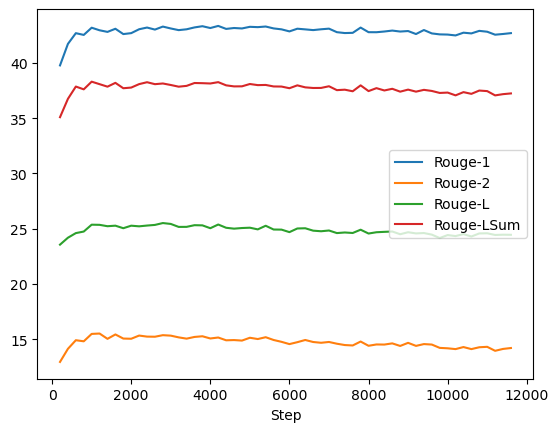

In [22]:
plt.plot(eval_steps, np.array(r1), label="Rouge-1")
plt.plot(eval_steps, np.array(r2), label="Rouge-2")
plt.plot(eval_steps, np.array(rL), label="Rouge-L")
plt.plot(eval_steps, np.array(rLSum), label="Rouge-LSum")
plt.xlabel("Step")
plt.legend()
plt.savefig("rouge")
plt.show()

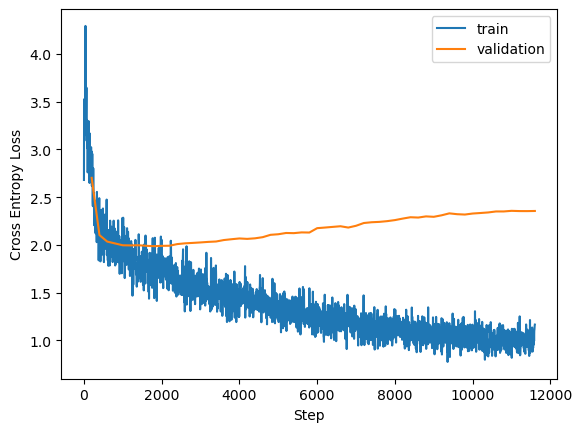

In [21]:
plt.plot(steps, train_loss, label="train")
plt.plot(eval_steps, eval_loss, label="validation")
plt.legend()
plt.ylabel("Cross Entropy Loss")
plt.xlabel("Step")
# plt.yscale('log')
plt.savefig("train_val_loss")
plt.show()